In [ ]:
##Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.7.0'

In [ ]:
##Loading the Images

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
path='/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images'

In [ ]:
#show image of Severe Tropical Storm 

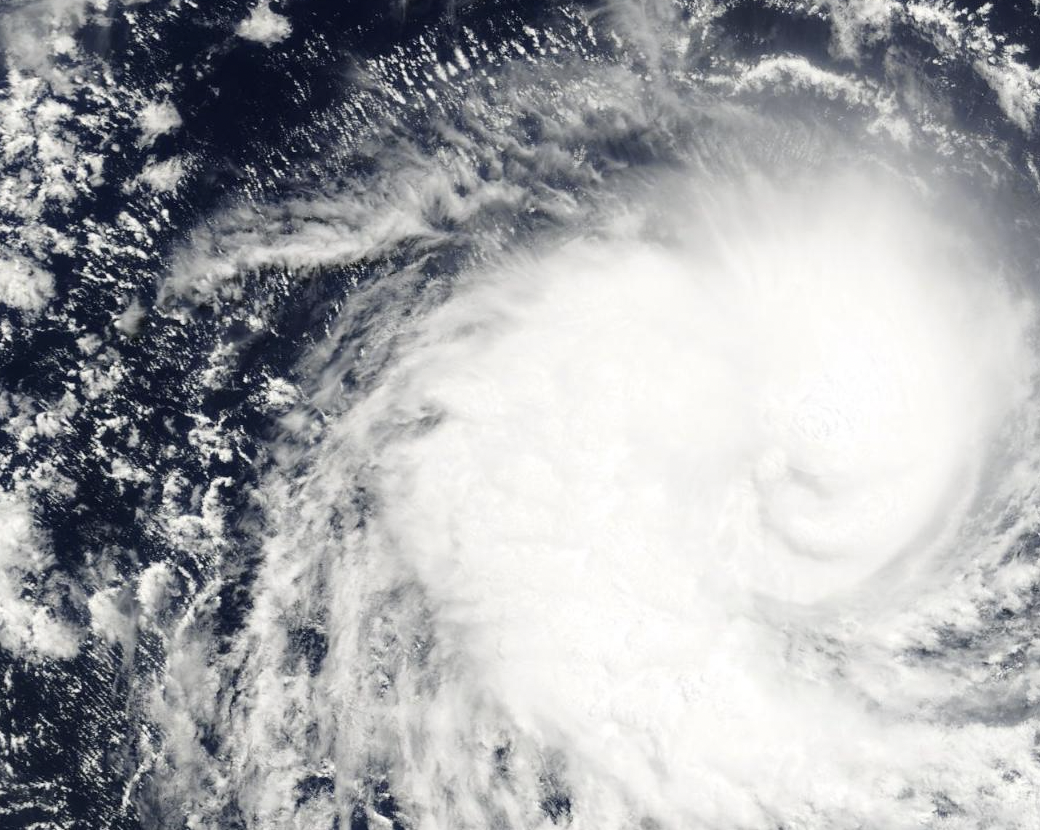

In [4]:
tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Train/Severe Tropical Storm/Screenshot 2022-01-31 at 10.18.16 PM.png')

In [ ]:
#show image of - Tropical Depression

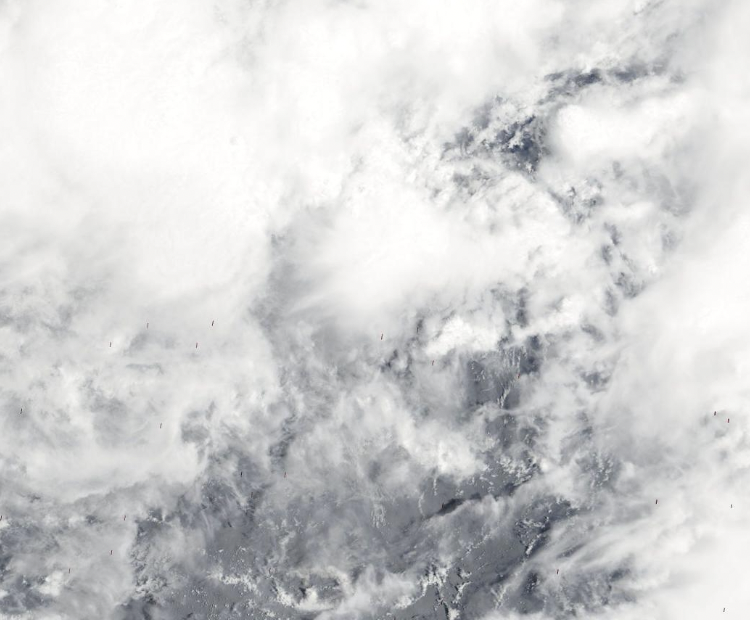

In [5]:
tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Train/Tropical Depression/Screenshot 2022-02-02 at 6.52.48 PM.png')

In [ ]:
##show image of - Tropical Strom

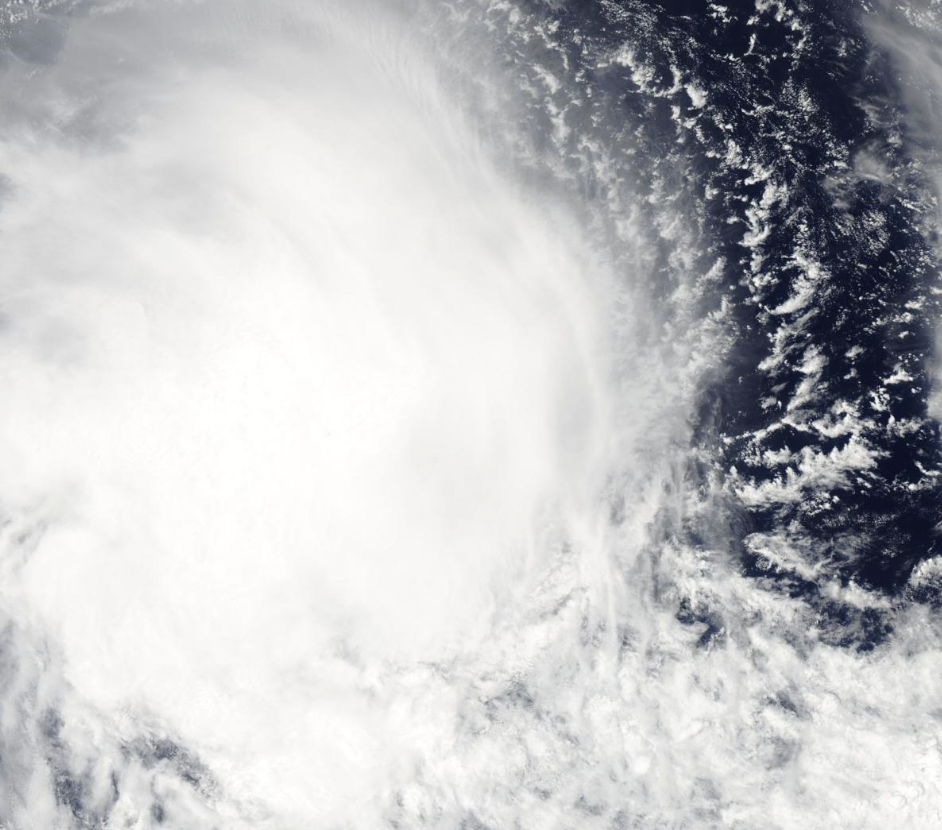

In [6]:
tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Train/Tropical Strom/Screenshot 2022-02-02 at 11.08.26 PM.png')



In [ ]:
##show image of - Typhoon

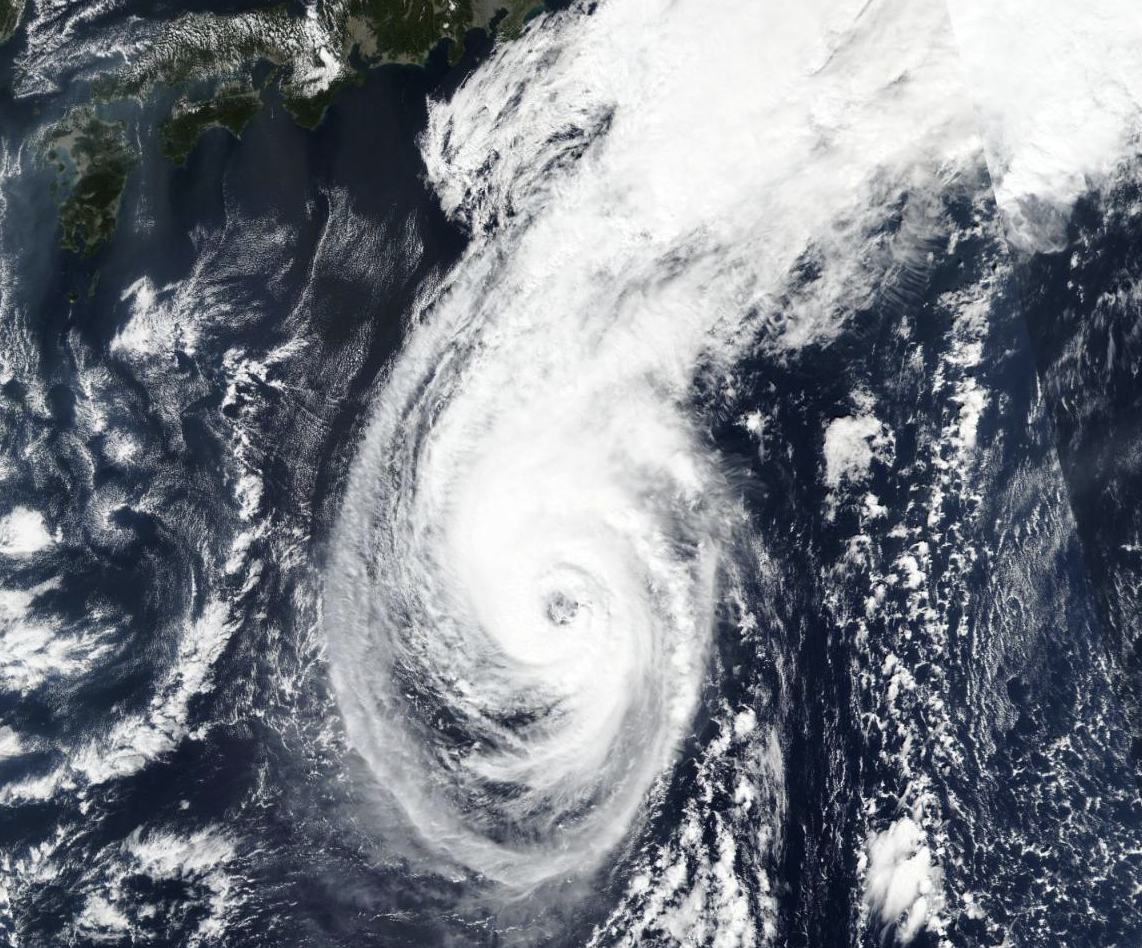

In [7]:
tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Train/Typhoon/Screenshot 2021-12-22 at 6.23.56 PM.png')

In [8]:
training_datagenerator = ImageDataGenerator(rescale = 1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip= True)

In [9]:
train_dataset=training_datagenerator.flow_from_directory('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Train',
                                                         target_size=(64,64),
                                                         batch_size=32,
                                                         class_mode='categorical',
                                                         shuffle=True)

Found 160 images belonging to 4 classes.


In [10]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3], dtype=int32)

In [11]:
train_dataset.class_indices

{'Severe Tropical Storm': 0,
 'Tropical Depression': 1,
 'Tropical Strom': 2,
 'Typhoon': 3}

In [12]:
test_datagenrator=ImageDataGenerator(rescale = 1./255)

In [13]:
test_dataset=training_datagenerator.flow_from_directory('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/Test',
                                                        target_size=(64,64),
                                                        batch_size=1,
                                                        class_mode='categorical',
                                                        shuffle=False)

Found 80 images belonging to 4 classes.


In [ ]:
##BUILDING AND TRAINING THE neural NETWORK

In [ ]:
#num of inputs+num out put/2
#(1152+4)/2

In [14]:
classifier=Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPool2D(pool_size= (2,2)))

classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPool2D(pool_size= (2,2)))

classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPool2D(pool_size= (2,2)))

classifier.add(Flatten())

#classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=4, activation='softmax'))

classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [15]:
classifier.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
hist=classifier.fit_generator(train_dataset,epochs=300,validation_data=train_dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/300
5/5 [==============================] - 77s 13s/step - loss: 1.4046 - accuracy: 0.2562 - val_loss: 1.3683 - val_accuracy: 0.2500
Epoch 2/300
5/5 [==============================] - 11s 2s/step - loss: 1.3565 - accuracy: 0.3313 - val_loss: 1.3380 - val_accuracy: 0.2875
Epoch 3/300
5/5 [==============================] - 11s 2s/step - loss: 1.3172 - accuracy: 0.3812 - val_loss: 1.2601 - val_accuracy: 0.4500
Epoch 4/300
5/5 [==============================] - 11s 3s/step - loss: 1.2273 - accuracy: 0.4250 - val_loss: 1.1272 - val_accuracy: 0.5063
Epoch 5/300
5/5 [==============================] - 11s 3s/step - loss: 1.0926 - accuracy: 0.4938 - val_loss: 1.0856 - val_accuracy: 0.4437
Epoch 6/300
5/5 [==============================] - 11s 2s/step - loss: 1.0576 - accuracy: 0.4625 - val_loss: 1.0003 - val_accuracy: 0.5500
Epoch 7/300
5/5 [==============================] - 11s 2s/step - loss: 0.9856 - accuracy: 0.5562 - val_loss: 0.9040 - val_accuracy: 0.6250
Epoch 8/300
5/5 [=========

In [ ]:
#120=45

In [17]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [18]:
test_dataset.class_indices

{'Severe Tropical Storm': 0,
 'Tropical Depression': 1,
 'Tropical Strom': 2,
 'Typhoon': 3}

In [19]:
predictions=classifier.predict(test_dataset)
predictions

array([[9.99999881e-01, 4.55356984e-14, 5.65708014e-08, 4.96895547e-09],
       [9.99999881e-01, 1.44891132e-09, 5.12884100e-08, 1.19588506e-07],
       [9.93089139e-01, 6.11809703e-26, 5.96395017e-14, 6.91082468e-03],
       [9.99998808e-01, 1.94875136e-16, 8.73135605e-07, 2.78768965e-07],
       [9.20932109e-07, 9.99999046e-01, 1.59320930e-08, 3.11209419e-13],
       [1.99086193e-04, 4.22653742e-02, 9.57535565e-01, 9.40039679e-17],
       [2.95922000e-05, 8.94679010e-01, 1.05291389e-01, 4.24524681e-16],
       [5.98832667e-02, 2.95233746e-29, 1.10216652e-05, 9.40105796e-01],
       [9.99462068e-01, 5.08789769e-16, 5.37046464e-04, 8.61482363e-07],
       [9.98938978e-01, 5.51990113e-18, 1.52385076e-06, 1.05955929e-03],
       [9.95231450e-01, 2.20515273e-10, 5.57630869e-07, 4.76800790e-03],
       [9.99680042e-01, 2.00447917e-04, 1.19502336e-04, 9.54749346e-09],
       [2.73927450e-02, 9.86476937e-17, 9.72607255e-01, 2.44225316e-08],
       [6.77287042e-01, 1.17035411e-01, 1.43192530e

In [20]:
predictions=np.argmax(predictions,axis=1)
predictions

array([0, 0, 0, 0, 1, 2, 1, 3, 0, 0, 0, 0, 2, 0, 3, 0, 3, 0, 2, 0, 2, 1,
       2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1,
       1, 2, 2, 2, 0, 2, 2, 2, 0, 1, 2, 1, 2, 1, 1, 1, 3, 3, 3, 3, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3])

In [21]:
test_dataset.class_indices

{'Severe Tropical Storm': 0,
 'Tropical Depression': 1,
 'Tropical Strom': 2,
 'Typhoon': 3}

In [22]:
test_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)

0.55

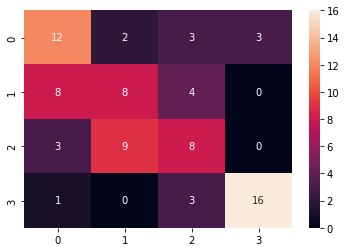

In [24]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_dataset.classes,predictions)
sns.heatmap(cm,annot=True)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes,predictions))

              precision    recall  f1-score   support

           0       0.50      0.60      0.55        20
           1       0.42      0.40      0.41        20
           2       0.44      0.40      0.42        20
           3       0.84      0.80      0.82        20

    accuracy                           0.55        80
   macro avg       0.55      0.55      0.55        80
weighted avg       0.55      0.55      0.55        80



Text(0, 0.5, 'Train and test loss ')

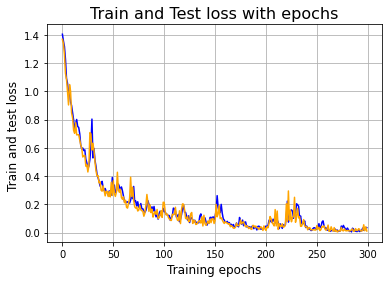

In [26]:
#ploting trsults with accuracy
plt.plot(hist.history['loss'],color='blue',label='train')
plt.plot(hist.history['val_loss'],color='orange',label='train')
plt.grid(True)
plt.title("Train and Test loss with epochs", fontsize=16)
plt.xlabel('Training epochs',fontsize=12)
plt.ylabel('Train and test loss ',fontsize=12)

Text(0, 0.5, 'Train and test accuracy')

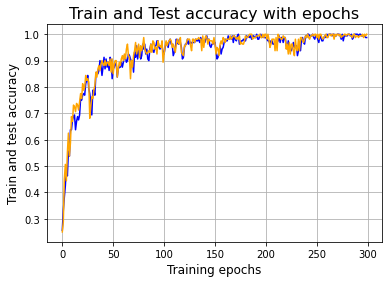

In [27]:
#ploting trsults with accuracy
plt.plot(hist.history['accuracy'],color='blue',label='train')
plt.plot(hist.history['val_accuracy'],color='orange',label='train')
plt.grid(True)
plt.title("Train and Test accuracy with epochs", fontsize=16)
plt.xlabel('Training epochs',fontsize=12)
plt.ylabel('Train and test accuracy',fontsize=12)

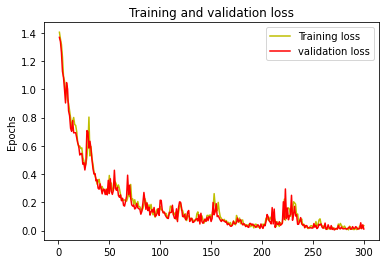

In [28]:
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
#plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label='validation loss')
plt.title('Training and validation loss')
plt.ylabel('Epochs')
plt.legend()
plt.show()

In [ ]:
##classifying one single image/testing with  singe image

In [76]:
image=cv2.imread('/content/gdrive/MyDrive/Sunik_sample_data/Cyclone_Images/sam_test/moderate_TS_S.png')

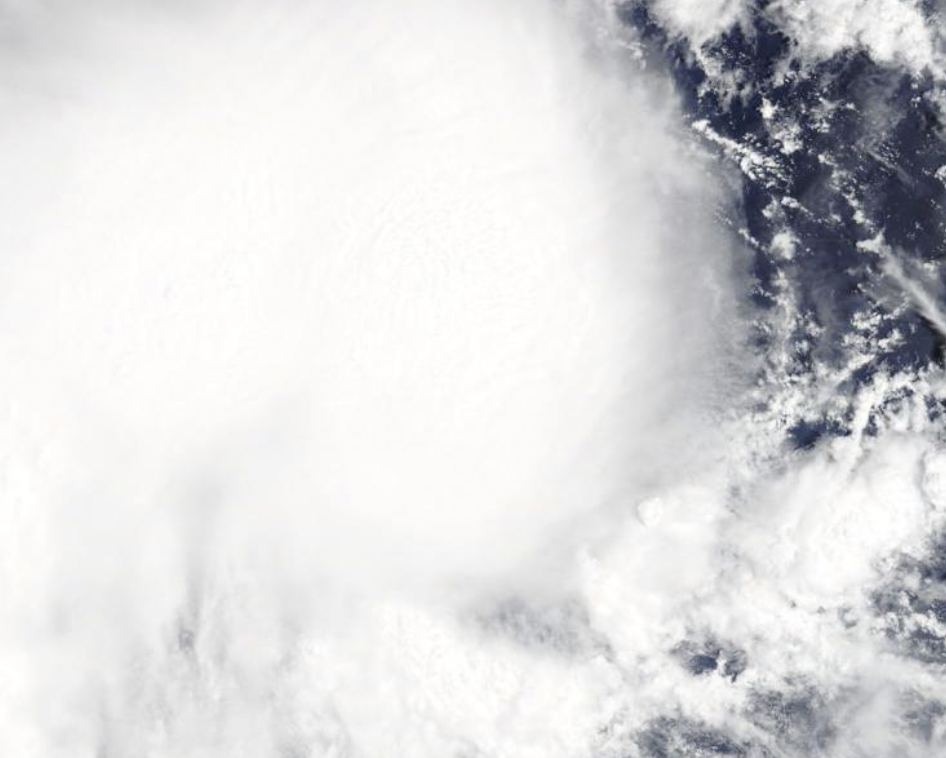

In [77]:
cv2_imshow(image)

In [78]:
image.shape

(758, 946, 3)

In [ ]:
#image

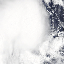

In [79]:
#reshape image
image=cv2.resize(image,(64,64))
cv2_imshow(image)

In [80]:
image

array([[[206, 205, 205],
        [211, 210, 211],
        [211, 210, 210],
        ...,
        [220, 221, 219],
        [119, 107, 103],
        [131, 120, 118]],

       [[203, 201, 200],
        [209, 207, 207],
        [211, 209, 209],
        ...,
        [246, 247, 248],
        [200, 195, 192],
        [169, 162, 159]],

       [[203, 201, 201],
        [206, 205, 205],
        [212, 210, 211],
        ...,
        [241, 240, 241],
        [229, 229, 229],
        [174, 171, 169]],

       ...,

       [[250, 251, 253],
        [249, 250, 251],
        [244, 246, 246],
        ...,
        [170, 166, 165],
        [139, 133, 128],
        [216, 214, 212]],

       [[249, 250, 251],
        [252, 253, 254],
        [246, 248, 249],
        ...,
        [205, 203, 202],
        [181, 171, 171],
        [188, 185, 184]],

       [[249, 250, 251],
        [252, 254, 254],
        [248, 250, 250],
        ...,
        [202, 199, 198],
        [201, 199, 198],
        [205, 201, 200]]

In [81]:
image=image/255

In [82]:
image

array([[[0.80784314, 0.80392157, 0.80392157],
        [0.82745098, 0.82352941, 0.82745098],
        [0.82745098, 0.82352941, 0.82352941],
        ...,
        [0.8627451 , 0.86666667, 0.85882353],
        [0.46666667, 0.41960784, 0.40392157],
        [0.51372549, 0.47058824, 0.4627451 ]],

       [[0.79607843, 0.78823529, 0.78431373],
        [0.81960784, 0.81176471, 0.81176471],
        [0.82745098, 0.81960784, 0.81960784],
        ...,
        [0.96470588, 0.96862745, 0.97254902],
        [0.78431373, 0.76470588, 0.75294118],
        [0.6627451 , 0.63529412, 0.62352941]],

       [[0.79607843, 0.78823529, 0.78823529],
        [0.80784314, 0.80392157, 0.80392157],
        [0.83137255, 0.82352941, 0.82745098],
        ...,
        [0.94509804, 0.94117647, 0.94509804],
        [0.89803922, 0.89803922, 0.89803922],
        [0.68235294, 0.67058824, 0.6627451 ]],

       ...,

       [[0.98039216, 0.98431373, 0.99215686],
        [0.97647059, 0.98039216, 0.98431373],
        [0.95686275, 0

In [83]:
image.shape

(64, 64, 3)

In [84]:
image=image.reshape(-1,64,64,3)
image.shape

(1, 64, 64, 3)

In [85]:
result =classifier.predict(image)
result


array([[1.7674715e-03, 3.2147807e-09, 9.9823254e-01, 1.9341897e-14]],
      dtype=float32)

In [86]:
result=np.argmax(result)
result

2

In [52]:
test_dataset.class_indices

{'Severe Tropical Storm': 0,
 'Tropical Depression': 1,
 'Tropical Strom': 2,
 'Typhoon': 3}

In [ ]:
##the prediction is able to classify that the given image is Tropical Depression

In [ ]:
##Saving and loading the model

In [ ]:
model_json=classifier.to_json()
with open('classifier.json','w') as json_file:
  json_file.write(model_json)

In [ ]:
from keras.models import save_model
classifier_saved=save_model(classifier,'/content/weights.hdf5')

In [ ]:
with open('classifier.json','r') as json_file:
  json_saved_model=json_file.read()
json_saved_model 

In [ ]:
classifier_loaded=tf.keras.models.model_from_json(json_saved_model)
classifier_loaded.load_weights('weights.hdf5')
classifier_loaded.compile(loss='categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])


In [ ]:
classifier_loaded.summary()